In [150]:
import numpy as np
import matplotlib.pyplot as plt
from process_images import *
from numpy_to_pandas import numpy_to_pandas_dataset
from utils import *

In [151]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
data = np.load("processed_dataset.npz")
df = numpy_to_pandas_dataset("processed_dataset.npz")
df.columns

Index(['pixel_00000', 'pixel_00001', 'pixel_00002', 'pixel_00003',
       'pixel_00004', 'pixel_00005', 'pixel_00006', 'pixel_00007',
       'pixel_00008', 'pixel_00009',
       ...
       'pixel_04087', 'pixel_04088', 'pixel_04089', 'pixel_04090',
       'pixel_04091', 'pixel_04092', 'pixel_04093', 'pixel_04094',
       'pixel_04095', 'label'],
      dtype='object', length=4097)

Ahora tenemos en df un DataFrame con las siguientes columnas:
- pixel_00000 - pixel_16383: 16384 (128x128) columnas, una para cada pixel, con un valor 0-255 de la escala de grises
- label: 0 si es Healthy, 1 si es Parkinson

## Ejercicio 2

In [153]:
# Dividimos el dataset en datos de entrenamiento y datos de test (80/20)

# Separar features (píxeles) y target (label)
X = df.drop('label', axis=1).values  # Convertir a numpy array
y = df['label'].values               # Convertir a numpy array

# Configuración del split
test_size = 0.2
random_state = 42
np.random.seed(random_state)  # Para reproducibilidad

# Obtener índices aleatorios
n_samples = len(X)
n_test = int(n_samples * test_size)
indices = np.random.permutation(n_samples)

# Dividir índices
test_indices = indices[:n_test]
train_indices = indices[n_test:]

# Crear splits
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

print(f"Dataset completo: {len(X)} muestras")
print(f"Train set: {len(X_train)} muestras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} muestras ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nDistribución de clases en train:")
print(f"  - Healthy (0): {np.sum(y_train == 0)}")
print(f"  - Parkinson (1): {np.sum(y_train == 1)}")
print(f"\nDistribución de clases en test:")
print(f"  - Healthy (0): {np.sum(y_test == 0)}")
print(f"  - Parkinson (1): {np.sum(y_test == 1)}")

Dataset completo: 1632 muestras
Train set: 1306 muestras (80.0%)
Test set: 326 muestras (20.0%)

Distribución de clases en train:
  - Healthy (0): 637
  - Parkinson (1): 669

Distribución de clases en test:
  - Healthy (0): 179
  - Parkinson (1): 147


## Ejercicio 3

In [181]:
w_final, b_final, train_mse, train_acc, test_mse, test_acc = gradient_descent(X_train, y_train, X_test, y_test, alpha=0.000000001, num_it=10000)
plot_metrics(train_mse, train_acc, test_mse, test_acc)

Iteración 0: Train MSE=0.4243, Acc=0.5123 | Test MSE=0.4793, Acc=0.4509
Iteración 100: Train MSE=0.5123, Acc=0.4877 | Test MSE=0.4509, Acc=0.5491
Iteración 200: Train MSE=0.5123, Acc=0.4877 | Test MSE=0.4509, Acc=0.5491
Iteración 300: Train MSE=0.5123, Acc=0.4877 | Test MSE=0.4509, Acc=0.5491
Iteración 400: Train MSE=0.5123, Acc=0.4877 | Test MSE=0.4509, Acc=0.5491


KeyboardInterrupt: 

## Ejercicio 4


Iteración 0: Train MSE=0.2501, Acc=0.4877 | Test MSE=0.2497, Acc=0.5491
Iteración 100: Train MSE=0.2489, Acc=0.5123 | Test MSE=0.2504, Acc=0.4509
Iteración 200: Train MSE=0.2480, Acc=0.5123 | Test MSE=0.2496, Acc=0.4509
Iteración 300: Train MSE=0.2470, Acc=0.5322 | Test MSE=0.2488, Acc=0.4632
Iteración 400: Train MSE=0.2461, Acc=0.5697 | Test MSE=0.2481, Acc=0.4847
Iteración 500: Train MSE=0.2452, Acc=0.6072 | Test MSE=0.2473, Acc=0.5276
Iteración 600: Train MSE=0.2442, Acc=0.6248 | Test MSE=0.2466, Acc=0.5675
Iteración 700: Train MSE=0.2433, Acc=0.6325 | Test MSE=0.2458, Acc=0.5859
Iteración 800: Train MSE=0.2424, Acc=0.6562 | Test MSE=0.2451, Acc=0.6166
Iteración 900: Train MSE=0.2416, Acc=0.6792 | Test MSE=0.2444, Acc=0.6258
Iteración 1000: Train MSE=0.2407, Acc=0.6968 | Test MSE=0.2437, Acc=0.6595
Iteración 1100: Train MSE=0.2398, Acc=0.7129 | Test MSE=0.2430, Acc=0.6748
Iteración 1200: Train MSE=0.2390, Acc=0.7152 | Test MSE=0.2423, Acc=0.6840
Iteración 1300: Train MSE=0.2381, Acc

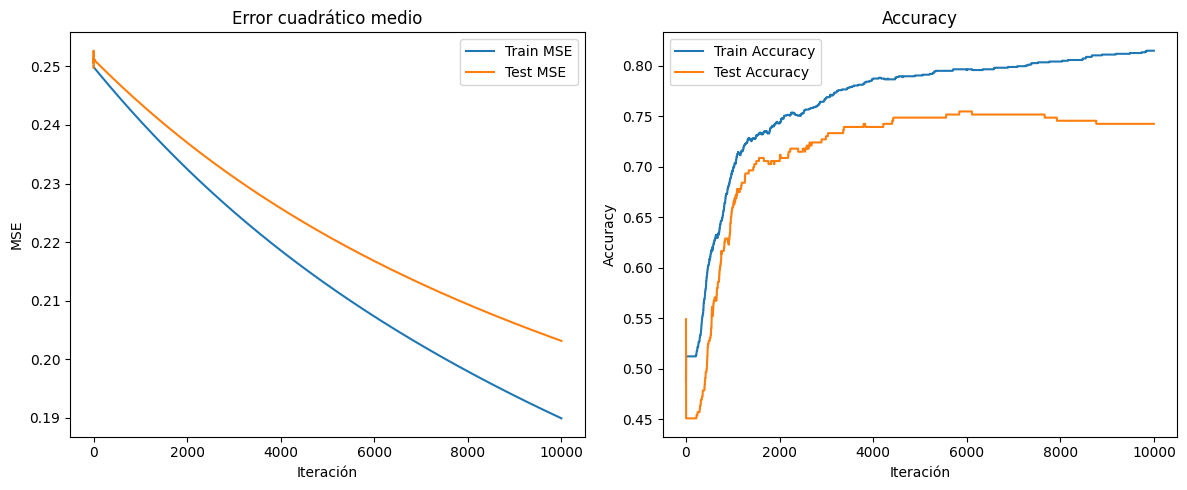

In [172]:
# Normalizamos los valores
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

w_final, b_final, train_mse, train_acc, test_mse, test_acc = gradient_descent(X_train_norm, y_train, 
                                                                              X_test_norm, y_test, 
                                                                              alpha=0.000001, num_it=10000)

plot_metrics(train_mse, train_acc, test_mse, test_acc)

## Ejercicio 5

In [ ]:
valores_alpha = [0.1, 0.01, 0.0001, 0.000001, 0.00000001]
alpha_mse_lists = []
alpha_acc_lists = []
num_it = 10000

for alpha in valores_alpha:
    w_final, b_final, train_mse, train_acc, test_mse, test_acc = gradient_descent(X_train, y_train, 
                                                                                  X_test, y_test, 
                                                                                  alpha=0.000001, num_it=10000)
    alpha_mse_lists.append(test_mse)
    alpha_acc_lists.append(test_acc)


